**Problem Statement:In this Project,the Prediction for Airline passengers is done using Timeseries analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("AirPassengers.csv")

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data["Month"]=pd.to_datetime(data["Month"])                                ## changing data type of Month

In [ ]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [ ]:
data.set_index("Month",inplace=True)                                       ## setting Month as index

In [ ]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

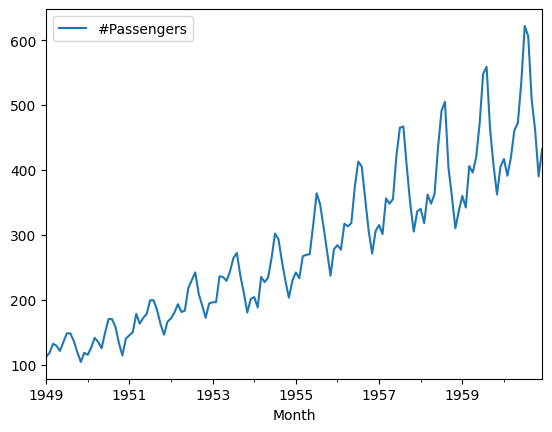

In [ ]:
data.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition=seasonal_decompose(data["#Passengers"])

Figure(640x480)


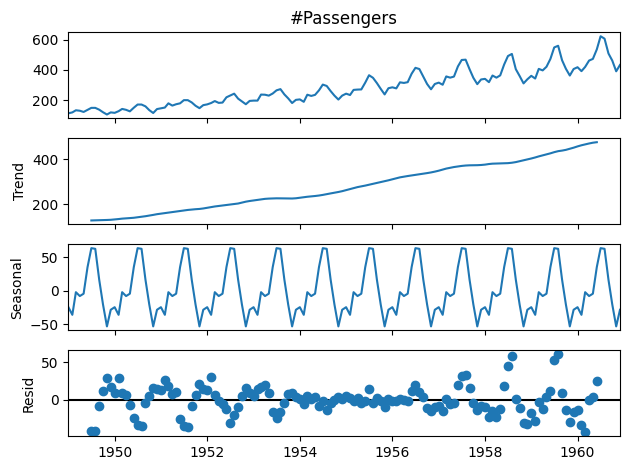

In [ ]:
print(decomposition.plot())                                                ## Plotting trend,seasonality,resid

In [ ]:
# Stationary Data - if the mean and the standard deviation is constant

In [ ]:
# adfuller Test - used to check the stationarity in the data

# null hypothesis- the data  is non- stationary
# alternate hypothesis -the data is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
results=adfuller(data)                                                     ## Using addfuller test

In [ ]:
results

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
p_value=results[1]
p_value

0.991880243437641

In [ ]:
if p_value>0.05:
  print("accept the null, data is non-stationary")
else:
  print("Reject the null, data is stationary")

accept the null, data is non-stationary


In [ ]:
# As the data is non - stationary, we need to change the data into stationary to apply the time series model

In [ ]:
mean_log=data.rolling(window=12).mean()                                     #Rolling stats
std_log=data.rolling(window=12).std()

In [ ]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


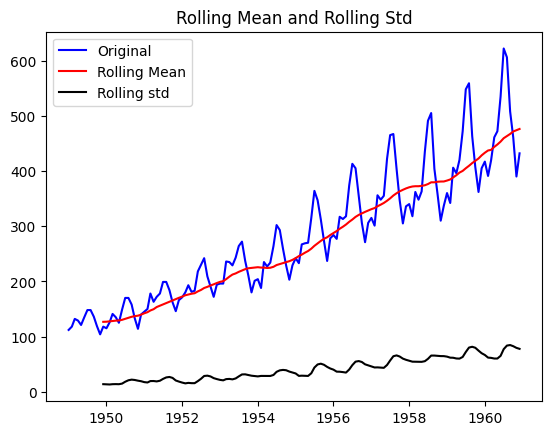

In [ ]:
plt.plot(data,color='blue',label='Original')                                #Lets plot the rolling mean and rolling std
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [ ]:
first_log=np.log(data)                                                      ## Taking log of the data (#Transformations)

In [ ]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
mean_log=first_log.rolling(window=12).mean()                                 #Rolling stats
std_log=first_log.rolling(window=12).std()

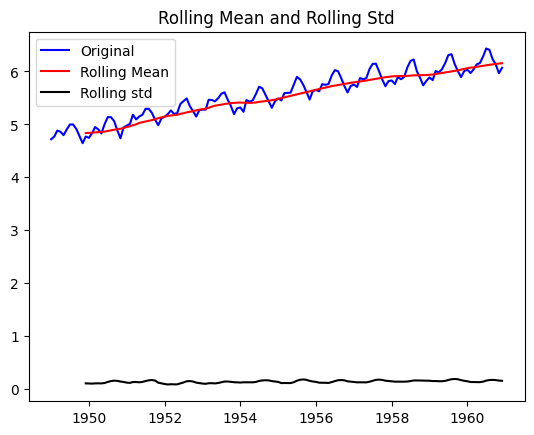

In [ ]:
plt.plot(first_log,color='blue',label='Original')                            #Lets plot the rolling mean and rolling std
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [ ]:
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

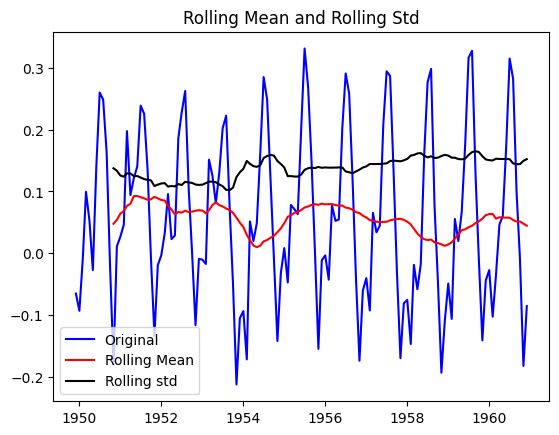

In [ ]:
plt.plot(new_data,color='blue',label='Original')                        #Lets plot the rolling mean and rolling std
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [ ]:
Result=adfuller(new_data)

In [ ]:
Result

(-3.1629079913008833,
 0.022234630001242206,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747034)

In [ ]:
p_value=Result[1]

In [ ]:
if p_value>0.05:
  print("accept the null, data is non-stationary")
else:
  print("Reject the null, data is stationary")

Reject the null, data is stationary


In [ ]:
# Now the data is stationary thus prepared for implementing the forecasting models

In [ ]:
# Performing  ACF and PACF to get p and q values

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

Figure(640x480)


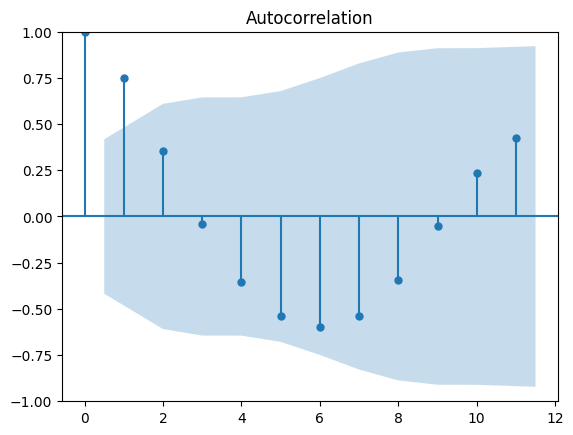

In [ ]:
acf_plot=acf(new_data.dropna())                                      #most recent positive value before getting -ve is 2 ie q=2
print(plot_acf(acf_plot))

In [ ]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

Figure(640x480)


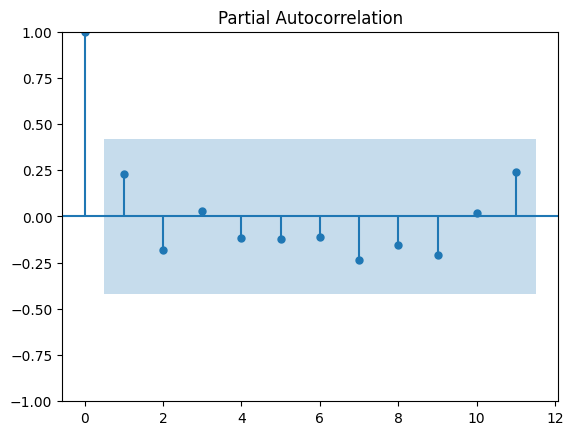

In [ ]:
pacf_plot=pacf(new_data.dropna())                                     #the data point or lag where there is a sudden shut-off -2 ie p=1
print(plot_pacf(pacf_plot))

In [ ]:
# from the above plots we got,
p=1
d=1
q=2

In [ ]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
train=new_data.iloc[:120]['#Passengers']                                 #splitting the data into train and test
test=new_data.iloc[120:]['#Passengers']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(train,order=(1,1,2))                                                #p,d,q values
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
new_data['prediction'] = model.predict(start=len(train),end=len(train)+len(test)- 1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

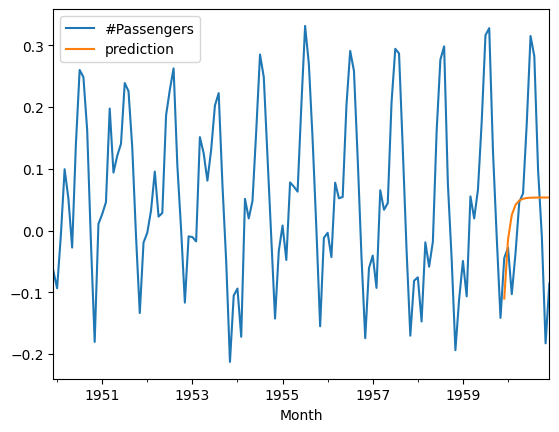

In [ ]:
new_data[['#Passengers','prediction']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,2,12)) #seasonal_order=(p,d,q,s)              ## udsing other method:SARIMAX
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='Month'>

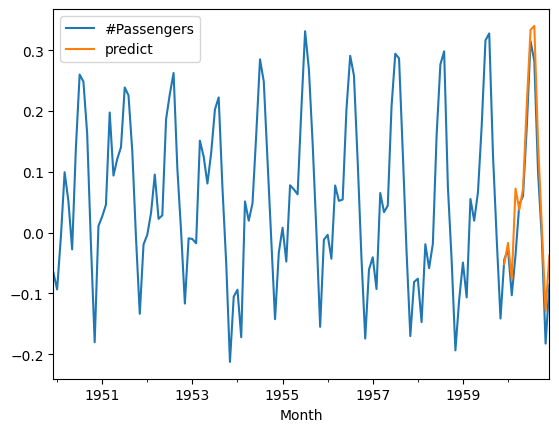

In [ ]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

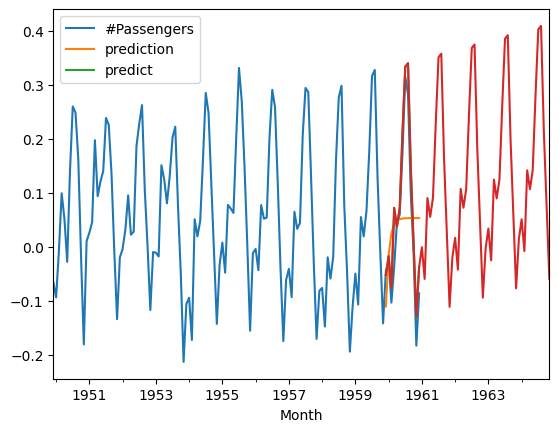

In [ ]:
forecast = model.forecast(steps=60)                                          ## Forecasting for 5 years
new_data.plot()
forecast.plot()